In [1]:
import sys
path = '/Users/Rob/work/pneumocode_train' # Give your path to pneumocode
sys.path.append(path+ '/source/') 
from pneumocode import pneumocode

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
nsero = 10
pc = pneumocode('fixed',nsero)

In [3]:
param_dic = {
    'Curr'  : 3,
    'npast' : np.zeros(nsero),
    'Lam'   : np.ones(nsero),
    'mu'    : np.ones(nsero),
    'f'     : np.ones(nsero),
    'eps'   : 1.0,
    'sig'   : 1.0,
    'mumax' : 1.0
}

param_dic['vef'] = 0.5*np.ones(nsero)
param_dic['vt'] = -np.ones(nsero)
param_dic['vt'][4] = 2.0

In [4]:
pc.create_people(100,param_dic)

In [5]:
pc.run_sim(10,20.0,0.05,time_snaps=[0.3,1.0,5.0,10.0])

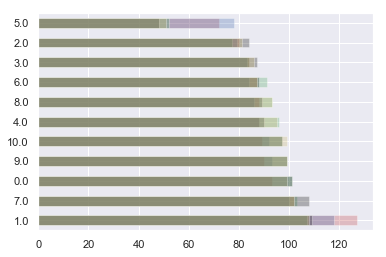

In [6]:
pd.Series(pc.sim_output['Curr'][0.3].flatten()).value_counts().plot.barh(color='r',alpha=0.3)
pd.Series(pc.sim_output['Curr'][1.0].flatten()).value_counts().plot.barh(color='b',alpha=0.3)
pd.Series(pc.sim_output['Curr'][5.0].flatten()).value_counts().plot.barh(color='g',alpha=0.3)
pd.Series(pc.sim_output['Curr'][10.0].flatten()).value_counts().plot.barh(color='k',alpha=0.3)
pd.Series(pc.sim_output['Curr'][20.0].flatten()).value_counts().plot.barh(color='y',alpha=0.3)
plt.show()

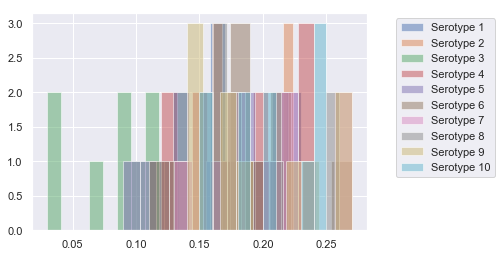

In [8]:
for npave, st in zip(
    pc.sim_output['npastave'][0.3],
    range(1,11)
): plt.hist(npave,label='Serotype '+ str(st),alpha=0.5)
plt.legend(bbox_to_anchor=(1.4,1.0))
plt.show()